In [2]:
import numpy as np
import pandas as pd
import glob
from datetime import timedelta
from datetime import date
import datetime
pd.set_option("display.max_columns", None)
import os
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import *
from datetime import datetime
import datetime
pd.set_option("display.max_columns", None)
import re
import win32com.client as win32
import gc
import operator
import scipy.stats as st

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [4]:
# Defining the parameter

purchase_cost = 12
lead = 9
order_size = 0.570
price = 16
starting_stock = 2750
mean_demand = 103
std_demand = 37
ch = 20
co = 1000
demand_lead = 705
service_level = 0.95

In [5]:
# Demand Distribution
def daily_demand(mean,sd):
    return np.random.normal(mean,sd)

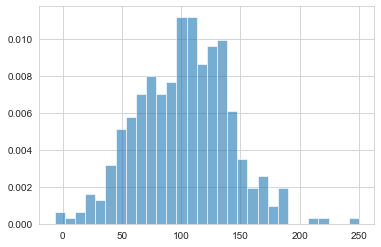

In [6]:
# Generate a plot of normal demand distribution
plt.hist(np.random.normal(mean_demand,std_demand,365),bins = 30, density= True, alpha = 0.6)
plt.show()

In [7]:
# Calculate z value
z_value = st.norm.ppf(service_level)
z_value

1.6448536269514722

In [8]:
# Calculate Safety Stock
safety_stock = z_value*std_demand*np.sqrt(lead)
safety_stock

182.5787525916134

In [9]:
# Calculate initial ROP 
rop = mean_demand*lead+safety_stock
rop

1109.5787525916135

In [10]:
Q = 1938

In [11]:
# Monte Carlo Simulation for Continuous review model - Simulating ordering in continuous review model with stochastic demand 
# Simulating the order pattern
def cc_monte_carlo_ray(q, r):
    inventory = starting_stock
    mean = mean_demand
    sd = std_demand
    lead_time = lead

    order_placed = False
    order_time = 0
    stock_out = 0
    # dictionary to store all the information
    data = {'inv_level': [], 'daily_demand': [], 'units_sold': [], 'units_lost': [], 'orders': [], 'Backorder':[],'Safety Stock':[]}

    
    for day in range(1, 365):
        day_demand = daily_demand(mean, sd)
        data['daily_demand'].append(day_demand)

        if inventory <= r and not order_placed:
            # Time to place an order
            order_placed = True
            order_time = day

        if order_placed and (day-order_time) == lead_time:
            data['orders'].append(q)
            inventory += q
            order_placed = False
            order_time = 0
        else:
            data['orders'].append(0)
            
        if inventory - day_demand >= 0:
            data['units_sold'].append(day_demand)
            data['units_lost'].append(0)
            data['Backorder'].append(0)
            inventory -= day_demand
        elif inventory - day_demand < 0:
            data['units_sold'].append(inventory)
            data['units_lost'].append(day_demand - inventory)
            data['Backorder'].append(1)
            inventory = 0
            stock_out += 1

        data['inv_level'].append(inventory)
        data["Safety Stock"].append(safety_stock)

    return pd.DataFrame(data)

In [12]:
cc_monte_carlo_ray(1900,1100).head(60)

,inv_level,daily_demand,units_sold,units_lost,orders,Backorder,Safety Stock
0,2612.577915,137.422085,137.422085,0.0,0,0,182.578753
1,2487.400039,125.177876,125.177876,0.0,0,0,182.578753
2,2415.484702,71.915337,71.915337,0.0,0,0,182.578753
3,2324.966587,90.518115,90.518115,0.0,0,0,182.578753
4,2230.040941,94.925646,94.925646,0.0,0,0,182.578753
5,2131.300822,98.740119,98.740119,0.0,0,0,182.578753
6,2018.247122,113.053700,113.053700,0.0,0,0,182.578753
7,1896.702798,121.544325,121.544325,0.0,0,0,182.578753
8,1808.883415,87.819383,87.819383,0.0,0,0,182.578753
9,1760.976304,47.907111,47.907111,0.0,0,0,182.578753


In [13]:
# Calculating Profit instance
def calculate_profit(data):
    unit_cost = purchase_cost
    selling_price = price
    holding_cost = ch
    order_cost = co
    size = order_size
    days = 365

    revenue = sum(data['units_sold']) * selling_price
    Co = len(data[data['orders']>0]) * order_cost
    Ch = sum(data['inv_level']) * holding_cost * size * (1 / days)
    cost = sum(data['orders']) * unit_cost

    profit = revenue - cost - Co - Ch

    return profit

In [14]:
# Defining Lost sales (backorders)
def backorders(data):
    return sum(data['Backorder'])/365

In [15]:
# simulating profit and lost sales
def cc_mc_simulation(q, r, num_simulations=50):
    profit_list = []
    orders_lost_list = []
    stock_out_list = []
    for sim in range(num_simulations):
        data = cc_monte_carlo_ray(q, r)
        # Calculating the profit
        profit = calculate_profit(data)
        profit_list.append(profit)
        # Calculating the orders lost
        total_demand = sum(data['daily_demand'])
        unsold_orders = sum(data['units_lost'])
        orders_lost_list.append(unsold_orders/total_demand)
        # Calculating Stock Out
        stock_out = backorders(data)
        stock_out_list.append(stock_out)
    mean_profit = sum(profit_list)/len(profit_list)
    mean_stockout = sum(stock_out_list)/len(stock_out_list)

    return pd.DataFrame([[q,r,mean_profit,mean_stockout]], columns=["Optimum Qty","Reorder Point","Mean Profit","Mean Stockout"])

In [16]:
cc_mc_simulation(2900,1100,50)

,Optimum Qty,Reorder Point,Mean Profit,Mean Stockout
0,2900,1100,133750.343852,0.006904


In [17]:
# Definiing function to sumulate profit and lost sales for different Q and R
def continous_review(q_guess, r_guess):
    q_low = Q-0.50*Q
    q_high = Q+0.50*Q
    q_range = [i for i in range(int(q_low), int(q_high), 10)]

    r_low = rop-0.50*rop
    r_high = rop+0.50*rop
    r_range = [i for i in range(int(r_low), int(r_high), 10)]

    review = pd.DataFrame()

    for q in q_range:
        for r in r_range:
            review = pd.concat([review,cc_mc_simulation(q,r)],axis= 0)
         

    return review


In [18]:
# Get the data frame 
data = continous_review(1676, 1067)

In [19]:
# Add Safety Stock to the data
data["Safety Stock"] = safety_stock

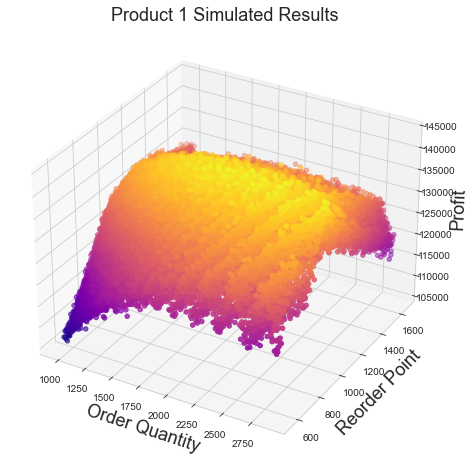

In [37]:
# Plot the simulated result
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Optimum Qty"], data["Reorder Point"], data["Mean Profit"],marker = 'o',
           c = data["Mean Profit"],cmap = "plasma")
ax.set_xlabel('Order Quantity', fontsize=18)
ax.set_ylabel('Reorder Point', fontsize=18)
ax.set_zlabel('Profit', fontsize=18)
ax.set_title('Product 1 Simulated Results', fontsize=18)


plt.show()

In [77]:
# Filter the best combination of q and r
optimum_point = data[data["Mean Profit"] == data["Mean Profit"].max()]
optimum_point

,Optimum Qty,Reorder Point,Mean Profit,Mean Stockout,Safety Stock
0,1739,1044,143338.545268,0.022082,182.578753


In [78]:
def plot_cr_profit_orders(q, r):
    profit_list = []
    orders_lost_list = []
    stock_out_list = []
    for sim in range(1000):
        data = cc_monte_carlo_ray(optimum_point.at[0,"Optimum Qty"], optimum_point.at[0,"Reorder Point"])
        # Calculating the profit
        profit = calculate_profit(data)
        profit_list.append(profit)
        # Calculating the orders lost
        total_demand = sum(data['daily_demand'])
        unsold_orders = sum(data['units_lost'])
        orders_lost_list.append(unsold_orders/total_demand)
        # Calculating Stock Out
        stock_out = backorders(data)
        stock_out_list.append(stock_out)
    p_list, o_list = profit_list,stock_out_list
    f, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.distplot(p_list, kde=False, ax=ax[0])
    ax[0].set_title(f'Profit Distribution : Mean {np.mean(p_list):.2f}')
    ax[0].axvline(x = np.mean(p_list), color='k', alpha = .5, ls = '--')
    sns.distplot(o_list, kde=False, ax=ax[1])
    ax[1].set_title(f'Orders Lost : Mean {np.mean(o_list):.3f}')
    ax[1].axvline(x = np.mean(o_list), color='k', alpha = .5, ls = '--')
    plt.tight_layout()
    print(np.mean(p_list), np.std(p_list))

In [79]:
def plot_cr_inventory(q,r):
    data = cc_monte_carlo_ray(optimum_point.at[0,"Optimum Qty"], optimum_point.at[0,"Reorder Point"])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,8))
    plt.plot(data['inv_level'], linewidth = 1.5)
    plt.plot(data['Safety Stock'], linewidth = 1.5)
    #plt.axhline(M, linewidth=2, color="grey", linestyle=":")
    plt.axhline(0, linewidth=2, color="grey", linestyle=":")
    plt.xlim(0,365)
    ax.set_ylabel('Inventory Level (units)', fontsize=18)
    ax.set_xlabel('Day', fontsize=18)
    ax.set_title(f"Continuous Review Model : Number of Orders {len(data[data['orders']>0])}", fontsize=18)

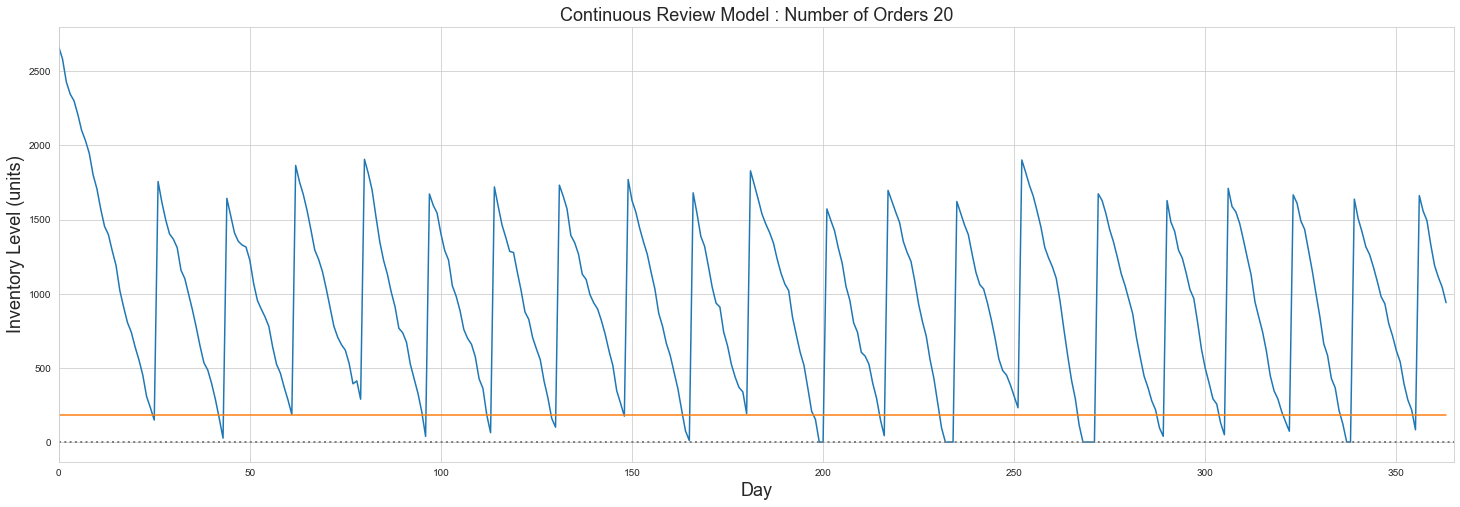

In [80]:
plot_cr_inventory(optimum_point.at[0,"Optimum Qty"], optimum_point.at[0,"Reorder Point"])

140433.2530161624 7034.635363661409


C:\Users\pdatta\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


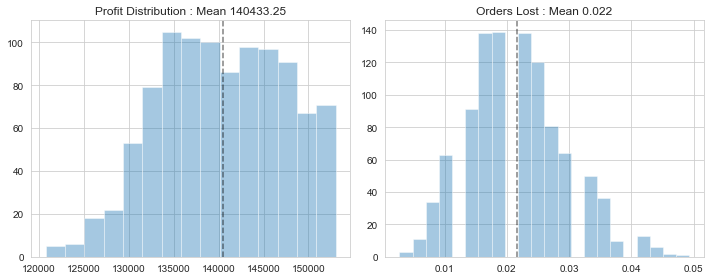

In [81]:
plot_cr_profit_orders(optimum_point.at[0,"Optimum Qty"], optimum_point.at[0,"Reorder Point"])